# Data Modeling & Regression

In [1]:
import sklearn.preprocessing as sk
import numpy as n
import pandas as p
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
path = './data/'

In [3]:
data1 = p.read_csv(path+"house_data.csv")
data2 = p.read_csv(path+"house_area_price.csv")

In [4]:
pr = PCA(n_components=3)
p.DataFrame(pr.fit_transform(data1.iloc[:,1:]).round(3))

,0,1,2
0,-9462.567,-1051.821,-229.497
1,-7861.558,669.567,53.798
2,-5115.706,-1650.404,-157.383
3,-10109.895,-457.240,820.903
4,-7028.848,-362.787,-314.010
...,...,...,...
21608,-13978.876,-536.572,-291.415
21609,-9291.086,533.604,-422.861
21610,-13763.708,-1253.666,-204.015
21611,-12721.368,-444.960,-302.840


In [5]:
x = data2.iloc[:,0:1]
y = data2.iloc[:,1:]

**Note** : *The term linear regression refers to using a linear model to represent the relationship between a set of independent variables and a dependent variable.* 

#### **Equation** :
* *y = a.x1 + b.x2 + c.x3 + d*

*where, **y** is dependent var and **xn** are independent vars*

### Linear Regression

In [6]:
from sklearn import linear_model 
from sklearn.model_selection import train_test_split as t

In [7]:
l_reg = linear_model.LinearRegression()
train_x, test_x, train_y, test_y = t(data2.iloc[:,0:1],data2.iloc[:,1:],test_size=0.25)

In [8]:
l_reg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
l_reg.intercept_
l_reg.coef_

array([[147.21109083]])

In [10]:
x = l_reg.predict(test_x)
X = l_reg.predict(train_x)

In [11]:
test_y

,price
4119,405000
6122,420550
12944,345000
1535,900000
7404,1600000
...,...
9984,205000
20811,580000
16193,1820000
5916,170000


In [71]:
l_reg.score(train_x,train_y)
#l_reg.intercept_ 

0.45453692543547963

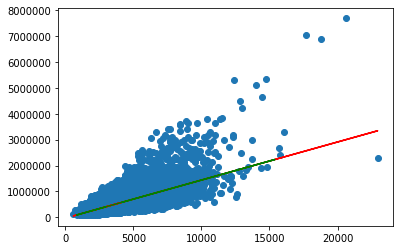

In [13]:
plt.scatter(train_x,train_y)
plt.plot(train_x,X,'r')
plt.plot(test_x,x,'g')

In [14]:
l_reg.score(test_x,test_y)

0.47305823728607677

In [15]:
l_reg.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'coef_': array([[147.21109083]]),
 '_residues': array([1.21051948e+15]),
 'rank_': 1,
 'singular_': array([215748.24293622]),
 'intercept_': array([-29933.00234251])}

## Practice of linear regression (failed cuz its a problem of classification)

In [16]:
data = p.read_csv(path+"Data.csv")

In [18]:
data = p.get_dummies(data)

### Data dependent and inpendent

In [19]:
data_x = data.iloc[:,:5]
data_y = data.iloc[:,6:]

In [20]:
data_x

,Age,Salary,Country_France,Country_Germany,Country_Spain
0,44.0,72000.0,1,0,0
1,27.0,48000.0,0,0,1
2,30.0,54000.0,0,1,0
3,38.0,61000.0,0,0,1
4,40.0,NaN,0,1,0
5,35.0,58000.0,1,0,0
6,NaN,52000.0,0,0,1
7,48.0,79000.0,1,0,0
8,50.0,83000.0,0,1,0
9,37.0,67000.0,1,0,0


### data imputation

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
imp = SimpleImputer(strategy='mean')

In [23]:
imp_data_x = imp.fit_transform(data_x).astype(n.int64)

In [24]:
imp_data_x.shape

(10, 5)

### trainnin

In [25]:
from sklearn.model_selection import train_test_split as t

In [26]:
train_X,test_X,train_Y,test_Y = t(imp_data_x,data_y.values.astype(n.int64),test_size=0.25)

### Data modeling

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
reg = LinearRegression()

In [29]:
reg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y = reg.predict(test_X)

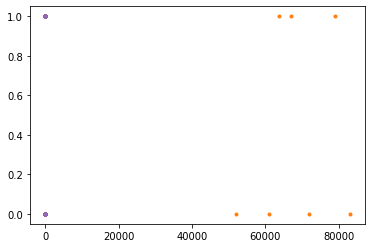

In [31]:
plt.plot(train_X,train_Y,'.')
#plt.plot(test_X,y,'r')

In [32]:
train_Y

array([[0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1]], dtype=int64)

In [33]:
train_X

array([[   44, 72000,     1,     0,     0],
       [   50, 83000,     0,     1,     0],
       [   40, 63777,     0,     1,     0],
       [   38, 61000,     0,     0,     1],
       [   38, 52000,     0,     0,     1],
       [   37, 67000,     1,     0,     0],
       [   48, 79000,     1,     0,     0]], dtype=int64)

## Ridge Regression

In [10]:
from sklearn import linear_model as l

In [11]:
d = p.read_csv(path+"Salary_Data.csv")

In [12]:
t_x = d.iloc[:,0:1]
t_y = d.iloc[:,1:]

In [120]:
red_reg = l.Ridge(alpha=0.00001)

In [121]:
red_reg.fit(t_x,t_y)

Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [119]:
red_reg.score(x,y)

0.9569392699572953

# Some more practice

In [3]:
startup = p.read_csv(path+'50_Startups.csv')

In [4]:
x = p.get_dummies(startup.iloc[:,:-1])
y = startup.iloc[:,-1:]

In [19]:
x.head(1)

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.2,136897.8,471784.1,0,0,1


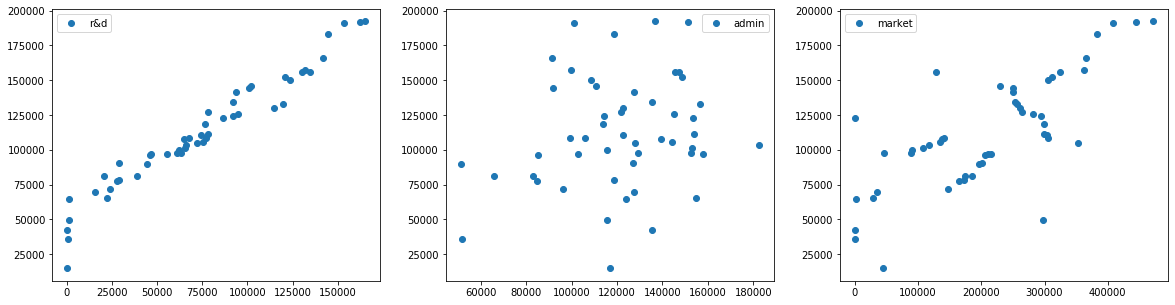

In [31]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3,1)
plt.scatter(x.iloc[:,0:1],y,label="r&d")
plt.legend()
plt.subplot(1, 3,2)
plt.scatter(x.iloc[:,1:2],y,label="admin")
plt.legend()
plt.subplot(1,3, 3)
plt.scatter(x.iloc[:,2:3],y,label="market")
plt.legend()

#### With admin

In [32]:
from sklearn.model_selection import train_test_split as t

In [33]:
tr_x,te_x,tr_y,te_y = t(x,y,test_size=0.2)

In [34]:
from sklearn.linear_model import LinearRegression

In [38]:
reg1 = LinearRegression()

In [39]:
reg1.fit(tr_x,tr_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
reg1.score(tr_x,tr_y)

0.9481576872049962

#### Without admin

In [45]:
x1 = x.drop(columns='Administration')

In [47]:
tr_x1,te_x1,tr_y1,te_y1 = t(x1,y,test_size=0.2)

In [48]:
reg2 = LinearRegression()
reg2.fit(tr_x1,tr_y1)
reg2.score(tr_x1,tr_y1)

0.9424065768327451

### with preprocessing

In [49]:
# data ranging
from sklearn.preprocessing import MinMaxScaler

In [50]:
mm = MinMaxScaler()

In [54]:
x2 = mm.fit_transform(x)

In [55]:
tr_x2,te_x2,tr_y2,te_y2 = t(x2,y,test_size=0.2)

In [56]:
reg3 = LinearRegression()
reg3.fit(tr_x2,tr_y2)
reg3.score(tr_x2,tr_y2)

0.9375784623047361

In [59]:
# robust scaling
from sklearn.preprocessing import RobustScaler

In [60]:
rs = RobustScaler()

In [61]:
x3 = rs.fit_transform(x)

In [118]:
tr_x3,te_x3,tr_y3,te_y3 = t(x3,y,test_size=0.2)

In [119]:
reg4 = LinearRegression()
reg4.fit(tr_x3,tr_y3)
reg4.score(tr_x3,tr_y3)

0.9608195468716967

In [108]:
x4 = x.drop(columns='Administration')
tr_x4,te_x4,tr_y4,te_y4 = t(x4,y,test_size=0.2)
reg5 = LinearRegression()
reg5.fit(tr_x4,tr_y4)
reg5.score(tr_x4,tr_y4)

0.9605605026597089

In [65]:
# now using ridge regression
from sklearn import linear_model as lm 

In [94]:
al = n.linspace(0.0000000000000000000000000000000000000000000000000001,1,num=100000)
rb1 = lm.RidgeCV(alphas=al)

In [110]:
rb1.fit(tr_x4,tr_y4)
rb1.score(tr_x4,tr_y4)

0.960544727819562

In [120]:
rb1.fit(tr_x3,tr_y3)
rb1.score(tr_x3,tr_y3)

0.9607947786626178

In [121]:
rb1.alpha_

0.08073080730807308

**Conclusion**: *linear is better than ridge for this type of dataset. when we have interrelated columns in a dataset then we use ridge regression. Also, robust scaling helped here.*

# LASSO Regression

In [4]:
ass = n.arange(-3,6)
n.sum(n.abs(ass))

21

In [5]:
"""
from sklearn import linear_model as l

reg_lasso = l.Lasso(alpha=0.1)
reg_lasso_al = l.LassoCV(alphas=alphas)

reg_lasso.fit(data,labels)

reg_lasso.score(data,labels)
pred = reg_lasso.predict(test_data)
"""

'\nfrom sklearn import linear_model as l\n\nreg_lasso = l.Lasso(alpha=0.1)\nreg_lasso_al = l.LassoCV(alphas=alphas)\n\nreg_lasso.fit(data,labels)\n\nreg_lasso.score(data,labels)\npred = reg_lasso.predict(test_data)\n'

In [8]:
from sklearn.model_selection import train_test_split as t
x1,x2,y1,y2 = t(x,y,test_size=0.25)

In [33]:
from sklearn import linear_model as l

#pred = reg_lasso.predict(test_data)

In [40]:
al = n.linspace(0.0001,2,num=1000)
reg_lasso = l.Lasso(alpha=1.5)
reg_lasso_al = l.LassoCV(alphas=al)

reg_lasso_al.fit(tr_x,tr_y)
reg_lasso.fit(tr_x,tr_y)
print(reg_lasso.score(tr_x,tr_y))
#x
print(reg_lasso_al.score(tr_x,tr_y),reg_lasso_al.alpha_)

c:\users\sonu\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9650697094863654
0.96506970165305 2.0


# Bayesian Regression

In [3]:
from sklearn import linear_model as lm

In [4]:
dt_s = p.read_csv(path+"50_Startups.csv")

In [5]:
from sklearn.model_selection import train_test_split as t

In [6]:
dt_s.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [20]:
x = p.get_dummies(dt_s.iloc[:,:-1])
y = dt_s.iloc[:,-1:].values.flatten()

In [29]:
tr_x,te_x,tr_y,te_y = t(x,y,test_size=0.25)

In [53]:
bayes_reg = lm.BayesianRidge(alpha_1=0.1, alpha_2=0.2)

In [54]:
bayes_reg.fit(tr_x,tr_y)

BayesianRidge(alpha_1=0.1, alpha_2=0.2, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [55]:
bayes_reg.score(tr_x,tr_y)

0.9648016059184099